In [1]:
# 단순선형회귀분석
import pandas as pd
import numpy as np
house = pd.read_csv('data/kc_house_data.csv')

In [2]:
# sqft_living(독립변수), price(종속변수)
house = house[['price', 'sqft_living']]

In [3]:
# 독립변수와 종속변수의 선형가정
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [5]:
# 0.7이면 강한 상관 관계가 있다고 판단.

In [6]:
from statsmodels.formula.api import ols

In [7]:
y = house['price'] # 종속변수는 시리즈 형식
X = house[['sqft_living']] # 독립변수는 df 형식

In [8]:
lr = ols('price ~ sqft_living', data = house).fit()

In [9]:
# 회귀계수 ,insercept : y절편
lr.params

Intercept     -43580.743094
sqft_living      280.623568
dtype: float64

In [26]:
# X값에 대한 y추정값(회귀직선)
y_pred = lr.predict(X)
y_pred

0        287555.067025
1        677621.826402
2        172499.404187
3        506441.449985
4        427866.850973
             ...      
21608    385773.315789
21609    604659.698749
21610    242655.296161
21611    405416.965541
21612    242655.296161
Length: 21613, dtype: float64

In [27]:
# 잔차
resid = y-y_pred

In [28]:
# MSE : 잔차제곱의 합을 평균
# RMSE : MSE의 root(회귀모델 평가, 비교, 설명 시 수정된 결정계수와 같이 사용)

mse = (resid**2).sum()/len(y)
rmse = np.sqrt(mse) # 추정치와 관측지와 평균적으로 얼마만큼 떨어져 있는지 확인가능

print(mse, " ", rmse) 

68351286833.03982   261440.79030067174


In [29]:
lr.summary()
# R-squared:	0.493 : 전체 모델의 49% 설명
# Adj. R-squared:	0.493 : 단순선형회귀분석이라 동일
# F통계량 : 독립변수, 회귀계수, R^2이 유의한지 검정, 2.100e+04 
# > 회귀모델이 유의히다.

# 회귀계수 유의한지? t통계량, -9.899, 144.920 둘다 유의하다

# 회귀게수 확인

# 오차의 독립성 : Durbin-Watson:	1.983 , 2와 가까우므로 오차의 독립성 만족

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:47:00   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

InvalidIndexError: (slice(None, None, None), None)

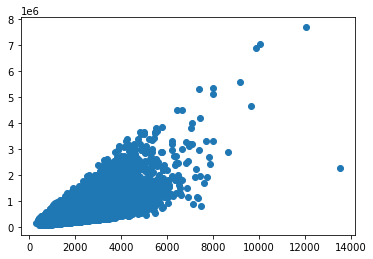

In [33]:
# 회귀모형의 시각화
import matplotlib.pyplot as plt
plt.scatter(X, y) ## 원 데이터 산포도
plt.plot(X, y_pred, color='red') ## 회귀직선 추가
 
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

In [ ]:
# Q-Qlot : 잔차가 정규분포를 따르는지 확인
# 잔차가 45 선에 많이 있다면 정규분포를 따른다.
# 오른쪽 꼬리가 올라간다? 왼쪽으로 치우친 데이터 
# > 선형회귀하기에는 부적합, 정규성/등분산성을 만족하지 못하므로
# > 설명력이 높지 않다.

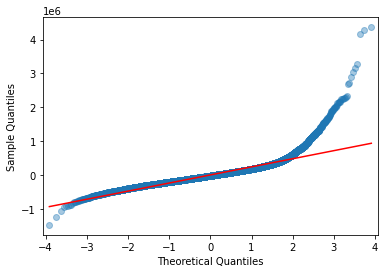

In [35]:
# Q-Q plot
# 잔차가 정규분포를 따르는지 확인

import statsmodels.api as sm 

sm.qqplot(resid, line="r", alpha=0.4) 
# line은 참조선을 그리는 것으로 '45'(45도 선), 's'(표준화된 라인), 'r'(회귀선), 'q'(사분위수를 통과하는 선) 옵션이 있음
plt.show()

In [36]:
# 모델설명(잔차가 정규성과 등분산성을 만족하지 않지만, ADP 시험용)
# 독립변수는 sqft_living이며, 종속변수는 price이다.
# F-통계량은 2.100e+04이며, F-통계량의 p-value는 0.05보다 매우 작기 떄문에 
# 추정된 회귀모형은 통계적으로 유의하다고 할 수 있다.
# 결졍계수는 0.493로, 이 회귀모형의 데이터에 대한 설명력은 49.3%이다.
# 상수항과 독립변수의 회귀계수에 대한 p-value가 각각 0.05보다 작으므로,
# 통계적으로 유의하다고 할 수 있다.
# 회귀식은 Price = sqft_living*280.6236 + -43580.743094 와 같이 도출할 수 있다.

In [37]:
# 다중 선형 회귀분석
# Price 종속변수, data/id 제외한 15개의 컬럼을 독립변수로 설정

In [39]:
house = pd.read_csv('data/kc_house_data.csv')
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,standard,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,standard,0,3,8,2310,0,2014,0,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,standard,0,3,7,1020,0,2009,0,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,standard,0,3,8,1600,0,2004,0,1410,1287


In [40]:
house = house.drop(['id','date'], axis = 1)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [42]:
house = pd.get_dummies(house, columns = ['waterfront'])

In [45]:
ols_str = 'price ~ '
for i in house.columns.drop('price'):
    ols_str += i + ' + '

ols_str = ols_str[:-3]
print(ols_str)

price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15 + waterfront_river_view + waterfront_standard


In [46]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula = ols_str, data = house)
result = model.fit()
result.summary()

# 범주형 변수가 추가되면 오류, 더미변수로 변환 필요

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2913.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:13:06   Log-Likelihood:            -2.9614e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21598   BIC:                         5.924e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.323e+06   9.26e+04     46.706      0.000    4.14e+06     4.5e+06
bedrooms              -3.931e+04   2026.602    -19.395      0.000   -4.33e+04   -3.53e+04
bathrooms              4.575e+04   3492.347     13.099      0.000    3.89e+04    5.26e+04
sqft_living             109.2685      2.435     44.877      0.000     104.496     114.041
sqft_lot                 -0.0016      0.051     -0.031      0.975      -0.102       0.099
floors                 2.688e+04   3783.810      7.104      0.000    1.95e+04    3.43e+04
view                   4.324e+04   2273.166     19.020      0.000    3.88e+04    4.77e+04
condition              1.951e+04   2496.774      7.814      0.000    1.46e+04    2.44e+04
grade                  1.197e+05   2249.149     53.230      0.000    1.15e+05    1.24e+05
sqft_above               51.5165      2.356     21.866      0.000      46.899      56.134
sqft_basement            57.7520      2.782     20.759      0.000      52.299      63.205
yr_built              -3570.1592     70.988    -50.292      0.000   -3709.302   -3431.017
yr_renovated             10.1596      3.914      2.596      0.009       2.488      17.831
sqft_living15            24.8733      3.600      6.909      0.000      17.816      31.930
sqft_lot15               -0.5505      0.078     -7.025      0.000      -0.704      -0.397
waterfront_river_view  2.451e+06   4.79e+04     51.154      0.000    2.36e+06    2.55e+06
waterfront_standard    1.872e+06   4.65e+04     40.266      0.000    1.78e+06    1.96e+06
==============================================================================
Omnibus:                    16329.452   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1194601.451
Skew:                           3.030   Prob(JB):                         0.00
Kurtosis:                      38.914   Cond. No.                     2.22e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# F통계량 0.05보다 작다 > 회귀모형 유의
# 수정된 결정계수 : 65.4 % 설명력
# 더빗왓슨 : 1.979, 오차의 독립성 만족
# sqft_living, sqft_lot 비슷? 하나의 P-value값이 높다(유의X)
# 둘 중 하나가 없었을 경우 위에서 유의하지 않았던 변수가 유의해질 수 있다.
# 즉, 변수간 다중공선성을 제거하지 않으면, 모델 성능이 저하될 수 있다.